In [1]:
from WarmStartUtils import *
from QAOAUtils import *
from qiskit_algorithms.optimizers import COBYLA
opt = COBYLA(maxiter = 10**3) ###Change if needed

In [2]:
n=9

In [3]:
x = []
rotation_options = [None, 0,-1]
BM2_losses = {None:[],0:[],-1:[]}
BM3_losses = {None:[],0:[],-1:[]}

BM2_probs = {None:[],0:[],-1:[]}
BM3_probs = {None:[],0:[],-1:[]}

for i in range(50):
    Q=drandm(n)
    A = dual_graph(Q)
    H = getHamiltonian(A)

    z,f = brute_force_maxcut(A)
    x.append(f)
    
    BM2_Y,BM2_theta_list,_=solve_BM2(A,iters = 100, reps=50, eta = 0.05)

    BM3_Y,BM3_theta_list,_=solve_BM3(A,iters = 100, reps=50, eta = 0.05)

    for rotation in rotation_options:
        BM2_ansatz = QAOA_Ansatz(cost = H ,mixer=Q2_mixer_qc(BM2_theta_list,rotation=rotation),p=1,initial=Q2_init(BM2_theta_list,rotation=rotation))  
        BM2_Data = circuit_optimization(BM2_ansatz,H,opt,reps=10,name=f"BM2, Rotation: {rotation}, graph: {i}")

        BM3_ansatz = QAOA_Ansatz(cost = H ,mixer=Q3_mixer_qc(BM3_theta_list,rotation=rotation),p=1,initial=Q3_init(BM3_theta_list,rotation=rotation))  
        BM3_Data = circuit_optimization(BM3_ansatz,H,opt,reps=10,name=f"BM3, Rotation: {rotation}, graph: {i}")

        BM2_losses[rotation].append(np.max(BM2_Data[0]))
        BM3_losses[rotation].append(np.max(BM3_Data[0]))

        BM2_probs[rotation].append(optimal_sampling_prob(BM2_ansatz,BM2_Data[1][np.argmax(BM2_Data[0])],H,z))
        BM3_probs[rotation].append(optimal_sampling_prob(BM3_ansatz,BM3_Data[1][np.argmax(BM3_Data[0])],H,z))

------------Beginning Optimization: BM2, Rotation: None, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM3, Rotation: None, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM2, Rotation: 0, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM3, Rotation: 0, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
I

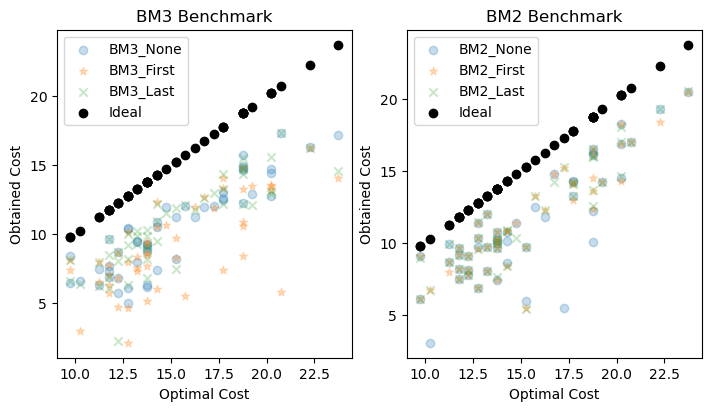

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(7,4))

axs[0].scatter(x,BM3_losses[None],marker = 'o', alpha = 0.25,label = "BM3_None")
axs[1].scatter(x,BM2_losses[None],marker = 'o', alpha = 0.25,label = "BM2_None")
axs[0].scatter(x,BM3_losses[0],marker = '*', alpha = 0.25,label = "BM3_First")
axs[1].scatter(x,BM2_losses[0],marker = '*', alpha = 0.25,label = "BM2_First")
axs[0].scatter(x,BM3_losses[-1],marker = 'x', alpha = 0.25,label = "BM3_Last")
axs[1].scatter(x,BM2_losses[-1],marker = 'x', alpha = 0.25,label = "BM2_Last")
axs[0].scatter(x,x,color='black',label='Ideal')
axs[1].scatter(x,x,color='black',label='Ideal')
axs[0].legend()
axs[1].legend()
axs[0].set_title("BM3 Benchmark")
axs[1].set_title("BM2 Benchmark")
axs[0].set_xlabel("Optimal Cost")
axs[1].set_xlabel("Optimal Cost")
axs[0].set_ylabel("Obtained Cost")
axs[1].set_ylabel("Obtained Cost")
plt.savefig("BMWarmstartTest.pdf",dpi=300)
plt.show()

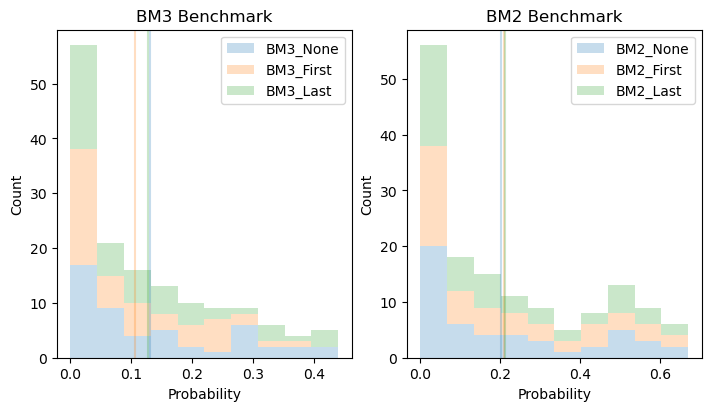

In [5]:
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(7,4))
axs[0].hist([BM3_probs[None],BM3_probs[0],BM3_probs[-1]],alpha=0.25,fill=True,label=["BM3_None","BM3_First","BM3_Last"],stacked=True)
axs[0].axvline(np.mean(BM3_probs[None]),alpha=0.25,linestyle='-',color='#1f77b4')
axs[0].axvline(np.mean(BM3_probs[0]),alpha=0.25,linestyle='-',color='#ff7f0e')
axs[0].axvline(np.mean(BM3_probs[-1]),alpha=0.25,linestyle='-',color='#2ca02c')
axs[0].legend()
axs[0].set_xlabel("Probability")
axs[0].set_ylabel("Count")
axs[1].hist([BM2_probs[None],BM2_probs[0],BM2_probs[-1]],alpha=0.25,fill=True,label=["BM2_None","BM2_First","BM2_Last"],stacked=True)
axs[1].axvline(np.mean(BM2_probs[None]),alpha=0.25,linestyle='-',color='#1f77b4')
axs[1].axvline(np.mean(BM2_probs[0]),alpha=0.25,linestyle='-',color='#ff7f0e')
axs[1].axvline(np.mean(BM2_probs[-1]),alpha=0.25,linestyle='-',color='#2ca02c')
axs[1].legend()
axs[1].set_xlabel("Probability")
axs[1].set_ylabel("Count")
axs[0].set_title("BM3 Benchmark")
axs[1].set_title("BM2 Benchmark")
plt.savefig("BMWarmstartTestProb.pdf",dpi=300)
plt.show()

In [6]:
x = []
rotation_options = [None, 0,-1]
GW2_losses = {None:[],0:[],-1:[]}
GW3_losses = {None:[],0:[],-1:[]}

GW2_probs = {None:[],0:[],-1:[]}
GW3_probs = {None:[],0:[],-1:[]}

for i in range(50):
    Q=drandm(n)
    A = dual_graph(Q)
    H = getHamiltonian(A)

    z,f = brute_force_maxcut(A)
    x.append(f)
    
    GW_Y = GW(A)
    
    GW2_Y,GW2_theta_list,_=GW2(A,reps=50,GW_Y=GW_Y)

    GW3_Y,GW3_theta_list,_=GW3(A,reps=50,GW_Y=GW_Y)
    
    for rotation in rotation_options:
        GW2_ansatz = QAOA_Ansatz(cost = H ,mixer=Q2_mixer_qc(GW2_theta_list,rotation=rotation),p=1,initial=Q2_init(GW2_theta_list,rotation=rotation))  
        GW2_Data = circuit_optimization(GW2_ansatz,H,opt,reps=10,name=f"BM2, Rotation: {rotation}, graph: {i}")
        
        GW3_ansatz = QAOA_Ansatz(cost = H ,mixer=Q3_mixer_qc(GW3_theta_list,rotation=rotation),p=1,initial=Q3_init(GW3_theta_list,rotation=rotation))  
        GW3_Data = circuit_optimization(GW3_ansatz,H,opt,reps=10,name=f"BM3, Rotation: {rotation}, graph: {i}")

        GW2_losses[rotation].append(np.max(GW2_Data[0]))
        GW3_losses[rotation].append(np.max(GW3_Data[0])) 

        GW2_probs[rotation].append(optimal_sampling_prob(GW2_ansatz,GW2_Data[1][np.argmax(GW2_Data[0])],H,z))
        GW3_probs[rotation].append(optimal_sampling_prob(GW3_ansatz,GW3_Data[1][np.argmax(GW3_Data[0])],H,z))

------------Beginning Optimization: BM2, Rotation: None, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM3, Rotation: None, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM2, Rotation: 0, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
------------Beginning Optimization: BM3, Rotation: 0, graph: 0------------
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
I

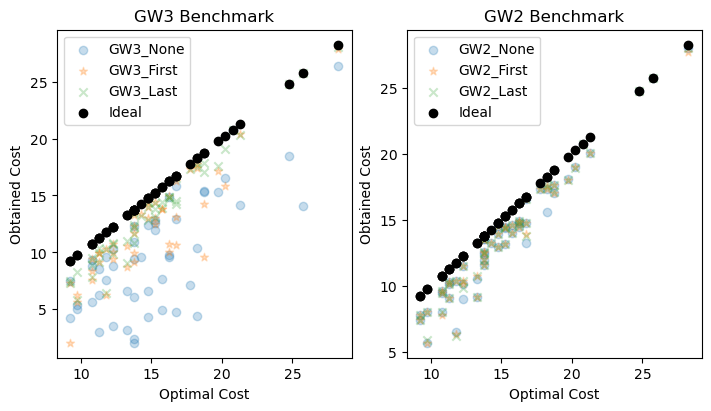

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(7,4))

axs[0].scatter(x,GW3_losses[None],marker = 'o', alpha = 0.25,label = "GW3_None")
axs[1].scatter(x,GW2_losses[None],marker = 'o', alpha = 0.25,label = "GW2_None")
axs[0].scatter(x,GW3_losses[0],marker = '*', alpha = 0.25,label = "GW3_First")
axs[1].scatter(x,GW2_losses[0],marker = '*', alpha = 0.25,label = "GW2_First")
axs[0].scatter(x,GW3_losses[-1],marker = 'x', alpha = 0.25,label = "GW3_Last")
axs[1].scatter(x,GW2_losses[-1],marker = 'x', alpha = 0.25,label = "GW2_Last")
axs[0].scatter(x,x,color='black',label='Ideal')
axs[1].scatter(x,x,color='black',label='Ideal')
axs[0].legend()
axs[1].legend()
axs[0].set_title("GW3 Benchmark")
axs[1].set_title("GW2 Benchmark")
axs[0].set_xlabel("Optimal Cost")
axs[1].set_xlabel("Optimal Cost")
axs[0].set_ylabel("Obtained Cost")
axs[1].set_ylabel("Obtained Cost")
plt.savefig("GWWarmstartTest.pdf",dpi=300)
plt.show()

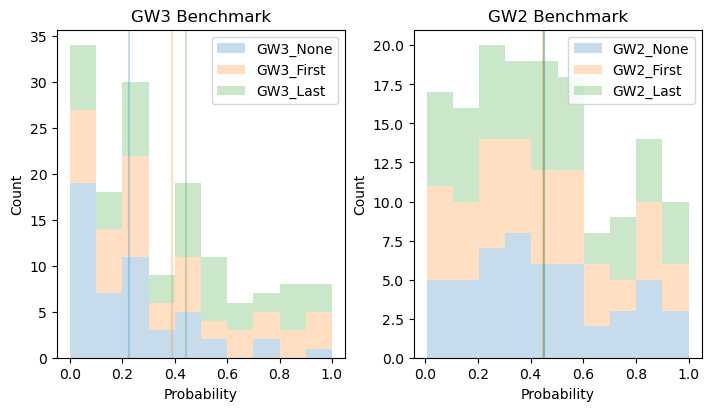

In [8]:
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(7,4))
axs[0].hist([GW3_probs[None],GW3_probs[0],GW3_probs[-1]],alpha=0.25,fill=True,label=["GW3_None","GW3_First","GW3_Last"],stacked=True)
axs[0].axvline(np.mean(GW3_probs[None]),alpha=0.25,linestyle='-',color='#1f77b4')
axs[0].axvline(np.mean(GW3_probs[0]),alpha=0.25,linestyle='-',color='#ff7f0e')
axs[0].axvline(np.mean(GW3_probs[-1]),alpha=0.25,linestyle='-',color='#2ca02c')
axs[0].legend()
axs[0].set_xlabel("Probability")
axs[0].set_ylabel("Count")
axs[1].hist([GW2_probs[None],GW2_probs[0],GW2_probs[-1]],alpha=0.25,fill=True,label=["GW2_None","GW2_First","GW2_Last"],stacked=True)
axs[1].axvline(np.mean(GW2_probs[None]),alpha=0.25,linestyle='-',color='#1f77b4')
axs[1].axvline(np.mean(GW2_probs[0]),alpha=0.25,linestyle='-',color='#ff7f0e')
axs[1].axvline(np.mean(GW2_probs[-1]),alpha=0.25,linestyle='-',color='#2ca02c')
axs[1].legend()
axs[1].set_xlabel("Probability")
axs[1].set_ylabel("Count")
axs[0].set_title("GW3 Benchmark")
axs[1].set_title("GW2 Benchmark")
plt.savefig("GWWarmstartTestProb.pdf",dpi=300)
plt.show()